# Unemployment of Blue Collar Workers Modeling

## Description

- A cross-section from 1982

- Number of observations : 4877

- Observation : individuals

- Country : United States

## Usage

1. Data(Benefits)

## Format

A time serie containing :

* **stateur**: state unemployment rate (in %)
* **statemb**: state maximum benefit level
* **state**: state of residence code
* **age**: age in years
* **tenure**: years of tenure in job lost
* **joblost**: a factor with levels (slack\_work,position\_abolished,seasonal\_job\_ended,other)
* **nwhite**: non-white ?
* **school12**: more than 12 years of school ?
* **sex**: a factor with levels (male,female)
* **bluecol**: blue collar worker ?
* **smsa**: lives is smsa ?
* **married**: married ?
* **dkids**: has kids ?
* **dykids**: has young kids (0-5 yrs) ?
* **yrdispl**: year of job displacement (1982=1,..., 1991=10)
* **rr**: replacement rate
* **head**: is head of household ?
* **ui**: applied for (and received) UI benefits ?

## Source

McCall, B.P. (1995) “The impact of unemployment insurance benefit levels on recipiency”, Journal of Business and Economic Statistics, 13, 189–198.

## References

Verbeek, Marno (2004) A Guide to Modern Econometrics, John Wiley and Sons, chapter 7.

Journal of Business Economics and Statistics web site : http://amstat.tandfonline.com/loi/ubes20.

In [2]:
!wget https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/Ecdat/Benefits.csv

--2017-12-07 14:35:15--  https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/Ecdat/Benefits.csv
Resolving raw.githubusercontent.com... 151.101.24.133
Connecting to raw.githubusercontent.com|151.101.24.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 502161 (490K) [text/plain]
Saving to: ‘Benefits.csv.2’

Benefits.csv.2      100%[===================>] 490.39K  1.87MB/s    in 0.3s    

2017-12-07 14:35:16 (1.87 MB/s) - ‘Benefits.csv.2’ saved [502161/502161]



In [706]:
reset -f

In [707]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict, Counter
from scipy import stats

%matplotlib inline

In [708]:
data = pd.read_csv('Benefits.csv')

In [709]:
df = pd.DataFrame(data=data)
df = df.drop('Unnamed: 0', axis=1)
df.head(20)

,stateur,statemb,state,age,tenure,joblost,nwhite,school12,sex,bluecol,smsa,married,dkids,dykids,yrdispl,rr,head,ui
0,4.5,167,42,49,21,other,no,no,male,yes,yes,no,no,no,7,0.290631,yes,yes
1,10.5,251,55,26,2,slack_work,no,no,male,yes,yes,no,yes,yes,10,0.520202,yes,no
2,7.2,260,21,40,19,other,no,yes,female,yes,yes,yes,no,no,10,0.432490,yes,yes
3,5.8,245,56,51,17,slack_work,yes,no,female,yes,yes,yes,no,no,10,0.500000,no,yes
4,6.5,125,58,33,1,slack_work,no,yes,male,yes,yes,yes,yes,yes,4,0.390625,yes,no
5,7.5,188,11,51,3,other,no,no,male,yes,yes,yes,no,no,10,0.482201,yes,yes
6,5.8,166,93,30,5,position_abolished,no,no,male,yes,yes,yes,yes,yes,6,0.334043,yes,yes
7,5.8,214,84,26,3,slack_work,no,no,male,yes,yes,yes,yes,yes,8,0.510989,yes,yes
8,7.7,213,84,54,20,other,no,no,male,yes,yes,yes,no,no,6,0.355634,yes,no
9,6.0,187,33,31,1,slack_work,no,no,male,yes,yes,yes,no,no,8,0.373272,yes,yes


## Feature cleaning

In [710]:
# check if we have rows with empty data in the dataset
for column in df.columns:
    print (column, "empty count :", df[column].isnull().sum())

stateur empty count : 0
statemb empty count : 0
state empty count : 0
age empty count : 0
tenure empty count : 0
joblost empty count : 0
nwhite empty count : 0
school12 empty count : 0
sex empty count : 0
bluecol empty count : 0
smsa empty count : 0
married empty count : 0
dkids empty count : 0
dykids empty count : 0
yrdispl empty count : 0
rr empty count : 0
head empty count : 0
ui empty count : 0


In [711]:
df.state.unique()

array([42, 55, 21, 56, 58, 11, 93, 84, 33, 12, 22, 54, 16, 83, 44, 73, 43,
       59, 62, 88, 74, 34, 61, 72, 86, 57, 71, 52, 14, 64, 41, 94, 82, 13,
       15, 31, 51, 23, 46, 91, 81, 85, 92, 87, 45, 47, 63, 35, 32, 95, 53])

* The concern for next step is to see if each State draws same rate for each person (because our assumption is that people in a certain States will have a same rate at the same year). If they are different, we have to take the avarage rate to account for the differences 

* Check to see if each data report has different rate in the same year for the same State.
* This validation also reveals what State rates are missing

In [712]:
# check consistence of employment rate for each state in each year
year_dict = defaultdict(list) # list should be entered otherwise don't work
no_report = []
same_rate_validation = False
for j,year in enumerate(df.yrdispl.unique()):
    for i,state_code in enumerate(df.state.unique()):
        # extract employment rate for each state at each year
        ur_unique = df.stateur[df.yrdispl == year][df.state == state_code].unique()
        if len(ur_unique) != 1:
            if len(ur_unique) == 0:
                year_dict[str(1981+year)].append(state_code)
                no_report.append([str(1981+year),state_code])
                print('There is no report in', 1981+year, 'for state with code =', state_code)
            else:
                print(i, state_code, j)
        else:
            same_rate_validation = True
# * We check to see if each person report different rate in the same state*
if same_rate_validation == True:
    print("\nAll reports are consistent")
no_report = np.array(no_report)

There is no report in 1988 for state with code = 52
There is no report in 1988 for state with code = 53
There is no report in 1991 for state with code = 95
There is no report in 1987 for state with code = 51
There is no report in 1989 for state with code = 88
There is no report in 1983 for state with code = 53
There is no report in 1990 for state with code = 47
There is no report in 1984 for state with code = 51

All reports are consistent


In [713]:
# counter = year_dict.items()
for key in year_dict.keys():
    print(len(year_dict[key]),"States have no report in", key,":",year_dict[key])

2 States have no report in 1988 : [52, 53]
1 States have no report in 1991 : [95]
1 States have no report in 1987 : [51]
1 States have no report in 1989 : [88]
1 States have no report in 1983 : [53]
1 States have no report in 1990 : [47]
1 States have no report in 1984 : [51]


In [714]:
no_report

array([['1988', '52'],
       ['1988', '53'],
       ['1991', '95'],
       ['1987', '51'],
       ['1989', '88'],
       ['1983', '53'],
       ['1990', '47'],
       ['1984', '51']],
      dtype='<U4')

In [715]:
df.state.unique(), len(df.state.unique())

(array([42, 55, 21, 56, 58, 11, 93, 84, 33, 12, 22, 54, 16, 83, 44, 73, 43,
        59, 62, 88, 74, 34, 61, 72, 86, 57, 71, 52, 14, 64, 41, 94, 82, 13,
        15, 31, 51, 23, 46, 91, 81, 85, 92, 87, 45, 47, 63, 35, 32, 95, 53]),
 51)

## Feature Engineering

In [716]:
#load file for state code
dff = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')

states = [i for i in sorted(df.state.unique())]
state_dict = defaultdict()
for i,state_code in enumerate(states):
    state_dict.update({str(state_code): i+1})

    
# state_dict.update({'AL': 22, 'AK': 49, 'AZ': 48, 'AR': 25, 'CA': 31, 'CO': 38, 'CT': 5, 'DE': 1, 'FL': , 'GA': , 'HI': ,
#    'ID': , 'IL': , 'IN': , 'IA': , 'KS': , 'KY': , 'LA': , 'ME': , 'MD': , 'MA': , 'MI': ,
#    'MN': , 'MS': , 'MO': , 'MT': , 'NE': , 'NV': , 'NH': , 'NJ': , 'NM': , 'NY': , 'NC': ,
#    'ND': , 'OH': , 'OK': , 'OR': , 'PA': , 'RI': , 'SC': , 'SD': , 'TN': , 'TX': , 'UT': ,
#    'VT': , 'VA': , 'WA': , 'WV': , 'WI': , 'WY'})

In [691]:
for key,value in state_dict.items():
#     print(key,value)
    df.state = df.state.apply(lambda x: value if str(x) == key else x)

In [692]:
df.state.unique()

array([16, 26,  7, 27, 29,  1, 49, 42, 12,  2,  8, 25,  6, 41, 18, 37, 17,
       30, 32, 46, 38, 13, 31, 36, 44, 28, 35, 23,  4, 34, 15, 50, 40,  3,
        5, 10, 22,  9, 20, 47, 39, 43, 48, 45, 19, 21, 33, 14, 11, 51, 24])

In [693]:
df.head()

,stateur,statemb,state,age,tenure,joblost,nwhite,school12,sex,bluecol,smsa,married,dkids,dykids,yrdispl,rr,head,ui
0,4.5,167,16,49,21,other,no,no,male,yes,yes,no,no,no,7,0.290631,yes,yes
1,10.5,251,26,26,2,slack_work,no,no,male,yes,yes,no,yes,yes,10,0.520202,yes,no
2,7.2,260,7,40,19,other,no,yes,female,yes,yes,yes,no,no,10,0.432490,yes,yes
3,5.8,245,27,51,17,slack_work,yes,no,female,yes,yes,yes,no,no,10,0.500000,no,yes
4,6.5,125,29,33,1,slack_work,no,yes,male,yes,yes,yes,yes,yes,4,0.390625,yes,no


In [694]:
# state_dict

## Visualizing data

In [717]:
df.describe()

,stateur,statemb,state,age,tenure,yrdispl,rr
count,4877.000000,4877.000000,4877.000000,4877.000000,4877.000000,4877.000000,4877.000000
mean,7.511031,180.660242,52.808079,36.129998,5.664138,5.203609,0.438366
std,2.500579,43.241595,25.834967,10.600737,6.279938,3.095116,0.106194
min,2.200000,84.000000,11.000000,20.000000,1.000000,1.000000,0.038610
25%,5.700000,150.000000,31.000000,28.000000,2.000000,2.000000,0.375212
50%,7.200000,177.000000,55.000000,34.000000,3.000000,5.000000,0.490446
75%,9.000000,205.000000,74.000000,43.000000,7.000000,8.000000,0.511574
max,18.000000,293.000000,95.000000,61.000000,41.000000,10.000000,0.691177


In [718]:
df.stateur.describe()

count    4877.000000
mean        7.511031
std         2.500579
min         2.200000
25%         5.700000
50%         7.200000
75%         9.000000
max        18.000000
Name: stateur, dtype: float64

In [719]:
# x = df.yrdispl.value_counts().sort_index().keys()
# y = df.yrdispl.value_counts().sort_index().values

# ts = pd.Series(y, index=[1981+i for i in x])
# ts.plot(kind='bar',use_index=True)
# # plt.plot([i-1.01 for i in x], y, 'go', ms=5)
# # plt.plot([str(1981+i) for i in x], y, lw=2.5, c='r')
# # plt.xlabel(np.arange(1981,1992))

In [720]:
# mean_rate_of_year = []
# for year in df.yrdispl.unique():
#     all_rates_in_year = df.stateur[df.yrdispl == year].unique().tolist()
#     mean_rate_of_year.append(np.mean(all_rates_in_year))

# x = np.arange(1,11)
# y = mean_rate_of_year

# ts = pd.Series(y, index=[1981+i for i in x])
# ts.plot(kind='bar' ,use_index=True)
# # sns.distplot(ts, kde=False)
# plt.title('Mean unemployment rate from 1982 - 1991')

In [721]:
# year_list = sorted(df.yrdispl.unique())
# state_list = sorted(df.state.unique())
# plot = False
# fig, ax = plt.subplots(figsize=(14,10))
# # plt.figure(figsize=(14,10))
# for index,i in enumerate(year_list):
#     d_values = df.state[df.yrdispl == i].value_counts().values
#     d_index = df.state[df.yrdispl == i].value_counts().index
#     d_index = [str(i) for i in d_index]

#     tuple_list = [(x,y) for x,y in zip(d_index, d_values)]
#     dim = np.array(tuple_list,  dtype=[('x', float), ('y', float)])
#     dim.sort(order='x')
#     dim2 = np.array([[x,y] for x,y in dim])

#     line_extension = 50
# #     ax.bar(d_index, np.array(d_values))
#     ax.plot( d_index, np.array(d_values) + index*line_extension, 'o', ms=6)
#     ax.plot( [str(int(i)) for i in dim2[:,0]],dim2[:,1] + index*line_extension,  lw=1)
#     if i == year_list[-1]:
#         ylim = ax.get_ylim()[1]
#         for state in state_list:
#             ax.plot([state for _ in range(int(ylim))] , np.arange(int(ylim)), 'r--', linewidth = .5)
# #         ax.set_ylim(0,65)
#     ax.set_yticklabels(['' for _ in year_list])
#     ax2 = ax.twinx()
# #     ax2.plot([index for _ in range(51)], year_list)
#     ax2.set_yticklabels(['' for _ in year_list])
    
# #     ax.axes.set_yticklabels()
# #     plt.vlines(d_index, 0, d_values, colors='b', lw=2, alpha=0.5)
#     # plt.ylim(0, 0.4)
#     # plt.xlim(-0.5, 5.5)
# #     ax.invert_yaxis()
# # plt.yticks(year_list)

# #     ax.plot([d_index[i] for _ in range(len(d_values))] , np.arange(ax.get_ylim()[1]))
# plt.gca().invert_yaxis()
# plt.title("Report counts for each state from 1982 - 1991")
# plt.show()

In [722]:
# df.groupby(['state','yrdispl']).size().reset_index(name='count')

In [723]:
# # lets check the time impact on the events
# dt_timegrid = df.groupby(['state','yrdispl']).size().reset_index(name='count')
# dt_timeheatmap = dt_timegrid.pivot(index='yrdispl', columns='state', values='count')
# # generate heatmap
# fig, ax = plt.subplots(figsize=(20,4))
# ax = sns.heatmap(dt_timeheatmap,annot=False, fmt="f",cbar=True)
# ax.invert_yaxis()
# ax.set_ylabel('Year: 1982 - 1991')
# ax.set_xlabel('US States')
# ax.set_title('Number of reports during 1982 - 1991')
# # ax.axes.set_yticklabels(["16-24 h","08-16 h","00-08 h"])
# # ax.axes.set_xticklabels(["MON", "TUE","WED","THU","FRI","SAT","SUN"])
# # pass


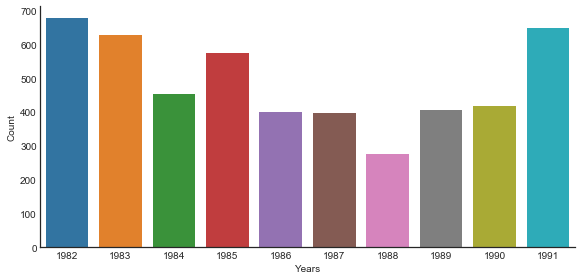

In [724]:
with sns.axes_style('white'):
    g = sns.factorplot("yrdispl", data=df, aspect=2.0,
                       kind="count")
    g.set_ylabels('Count')
    g.set_xlabels('Years')
    g.set_titles('Number of reports 1982-1991')
    g.set_xticklabels([str(1981+i) for i in sorted(df.yrdispl.unique())])

Text(0.5,1,'State unemployment rates during 1982 - 1991')

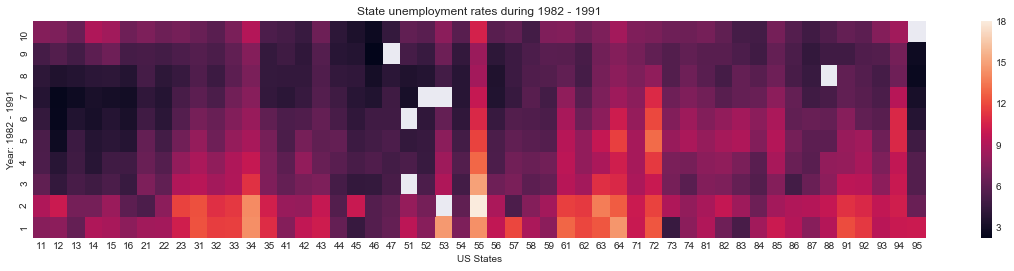

In [725]:
# lets check the time impact on the events
dt_timegrid = df.groupby(['state','yrdispl','stateur']).size().reset_index(name='count')
dt_timeheatmap = dt_timegrid.pivot(index='yrdispl', columns='state', values='stateur')
# generate heatmap
fig, ax = plt.subplots(figsize=(20,4))
ax = sns.heatmap(dt_timeheatmap,annot=None, fmt="f",cbar=True, square=None)
ax.invert_yaxis()
ax.set_ylabel('Year: 1982 - 1991')
ax.set_xlabel('US States')
ax.set_title('State unemployment rates during 1982 - 1991')
# ax.axes.set_yticklabels(["16-24 h","08-16 h","00-08 h"])
# ax.axes.set_xticklabels(["MON", "TUE","WED","THU","FRI","SAT","SUN"])
# pass


['1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991']


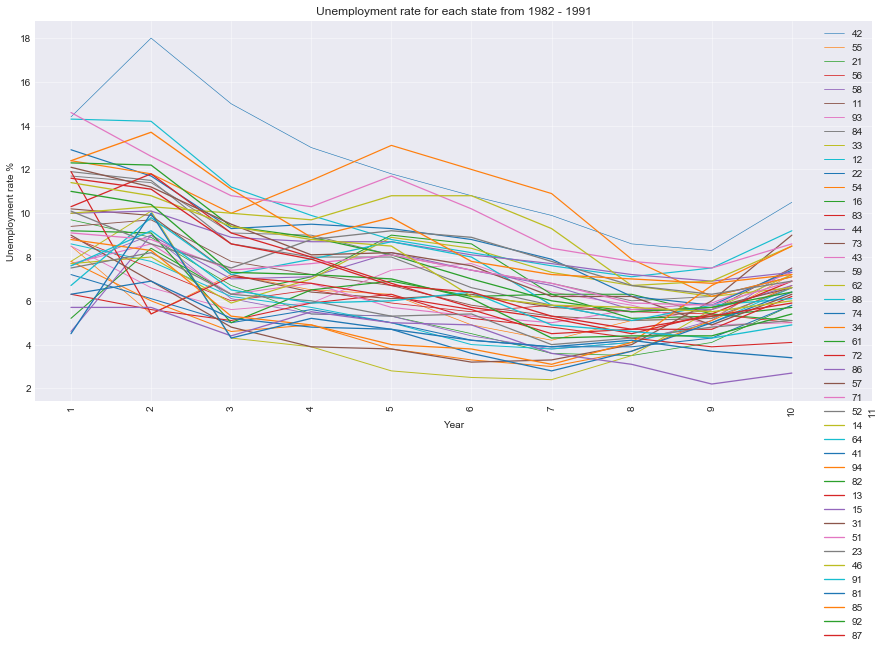

In [726]:
fig= plt.figure(figsize=[15,7])
rate_list = []
year_list = sorted(df.yrdispl.unique())
plot = False
for j,state_code in enumerate(df.state.unique()):
    for i in year_list:
        try:
            valid = [v for v in year_dict[str(1981+i)] if v == state_code]
            if valid != []:
                plot = False
#                 print(valid)
            rate = df.stateur[df.yrdispl == i][df.state == state_code].unique()
            rate_list.append(rate[0])
        except:
            pass
#             print(1981+i,rate)
    if plot == True:
        plt.plot([o for o in year_list], [v for v in rate_list], lw = 0.5+j/(10+j))
    else:
        plot = True
    plt.title("Unemployment rate for state code through 1982 - 1991")
    rate_list = []
years = [str(1981+i) for i in range(1,11)]
print(years)
plt.xticks([o for o in year_list])
plt.xlabel("Year")
plt.ylabel("Unemployment rate %")
plt.xticks(range(1,12), rotation='vertical')
plt.title("Unemployment rate for each state from 1982 - 1991")
plt.legend(df.state.unique())
plt.grid(True, axis='x', which='major', alpha=.5)
plt.grid(True, axis='y', which='major', alpha=.5)

plt.show()

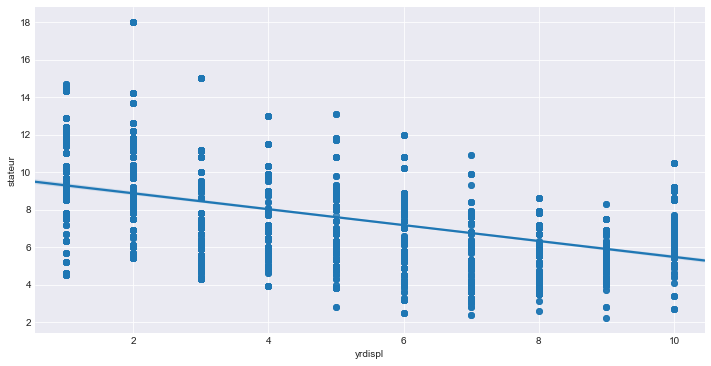

In [727]:
plt.figure(figsize=(12,6))
sns.regplot('yrdispl','stateur', data=df, fit_reg=True, ci=95, x_ci=95)

In [728]:
# calculate the changing rate between year
all_most_rates = []
prob_state = defaultdict()
for state in df.state.unique():
    rates = [int(np.ceil(i)) for i in df.stateur[df.state == state].unique()]
    counts = Counter(rates)
    total = sum(counts.values())
    probability_mass = {k:v/total for k,v in counts.items()}
    most_rate = max(probability_mass.values())
    prob_state.update({state: most_rate})
# prob_state = Counter(most_rate)

Text(0.5,1,'Maximum unemployment rate difference between 2 consecutive years of 51 States')

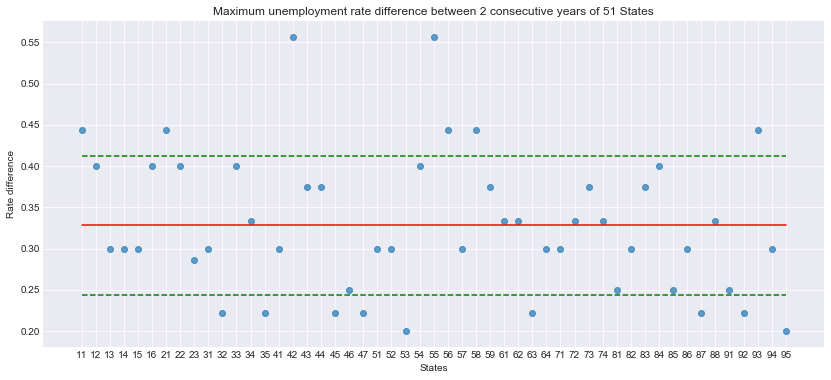

In [729]:
# plot changing rates over 10 years
fig, ax = plt.subplots(figsize=(14,6))
sort_dict = [v for i,v in enumerate(zip(prob_state.keys(),sorted(prob_state.values(), reverse=True)))]
x = [str(i[0]) for i in sort_dict]
y = [round(i[1], 3) for i in sort_dict]
mean, std= np.mean(y), np.std(y)
plt.plot(np.arange(len(x)), [mean for _ in range(len(x))], 'r-', label='line 1', linewidth=1.5)
plt.plot(np.arange(len(x)), [mean-std for _ in range(len(x))], 'g--', label='line 2', linewidth=1.5)
plt.plot(np.arange(len(x)), [mean+std for _ in range(len(x))], 'g--', label='line 2', linewidth=1.5)
plt.scatter(x, y, alpha=.7)
plt.ylabel('Rate difference')
plt.xlabel('States')
plt.title('Maximum unemployment rate difference between 2 consecutive years of 51 States')

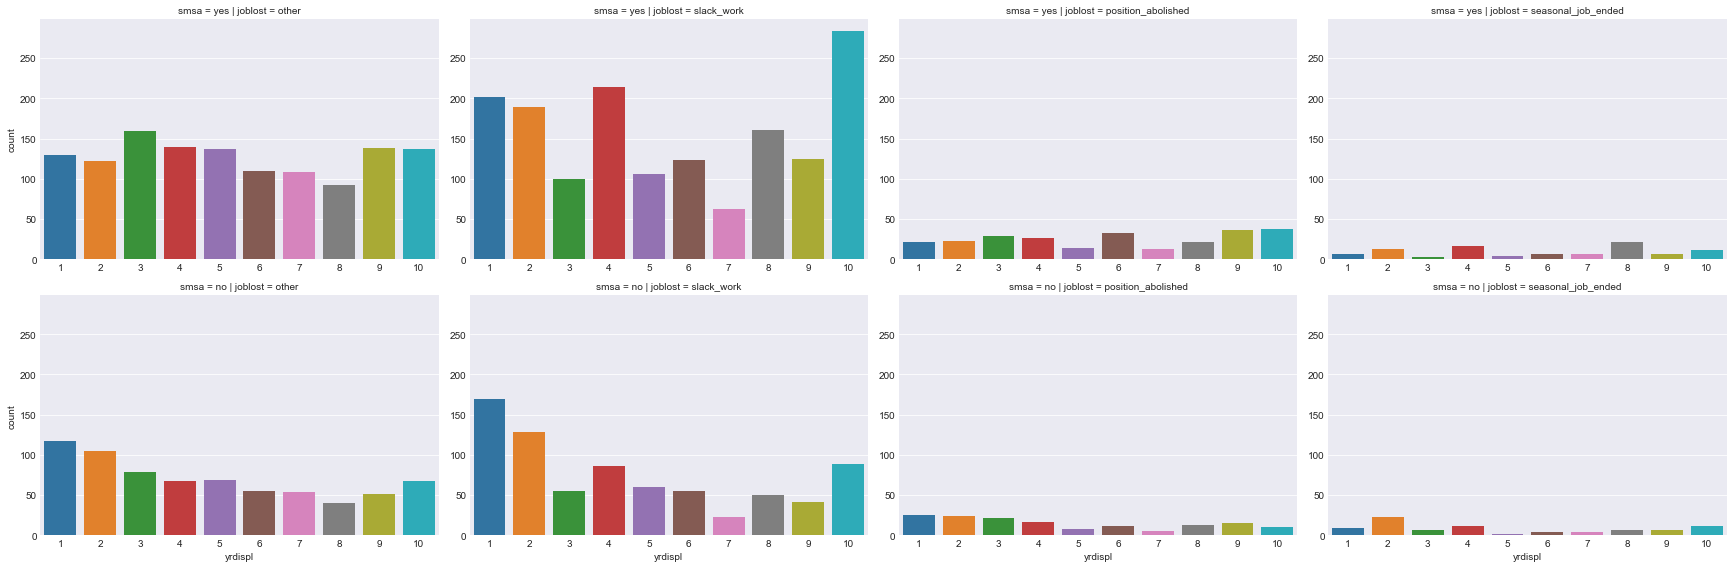

In [730]:
# smsa = Standard Metropolitan Statistical Area
# plotting conditional factors across 10 years
g = sns.factorplot(x='yrdispl', row='smsa', col='joblost', data=df, ci=.95,
               kind='count', size=4, aspect=1.5)

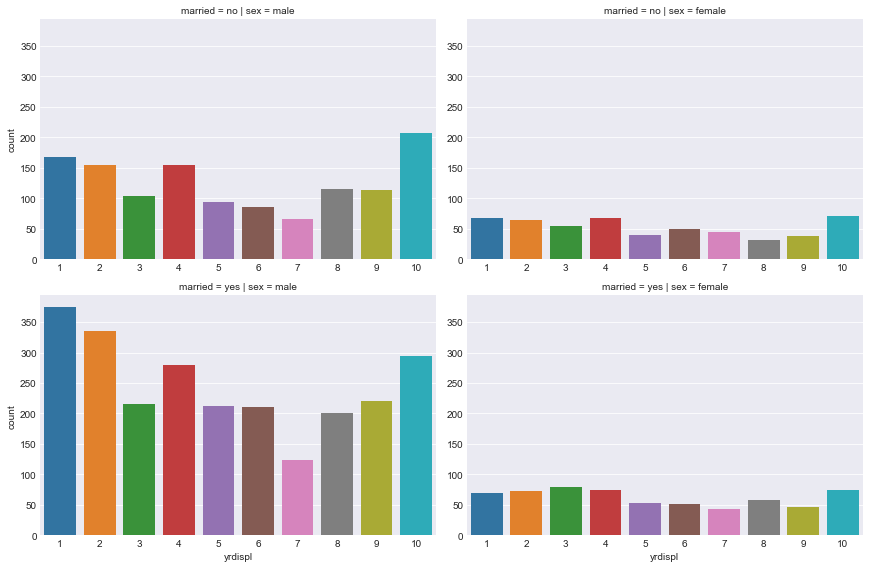

In [731]:
g = sns.factorplot(x='yrdispl', row='married', col='sex', data=df, ci=.95,
               kind='count', size=4, aspect=1.5)

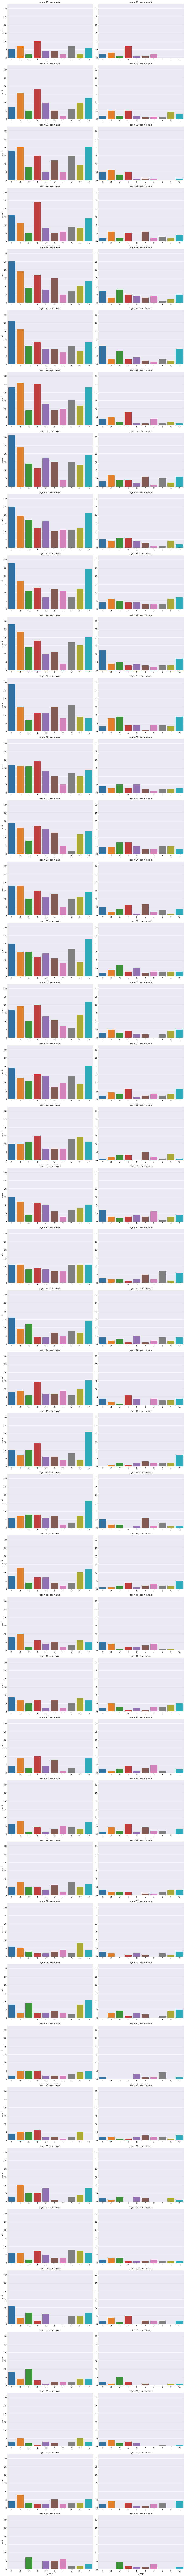

In [732]:
g = sns.factorplot(x='yrdispl', row='age', col='sex', data=df, ci=.95,
               kind='count', size=4, aspect=1.5)

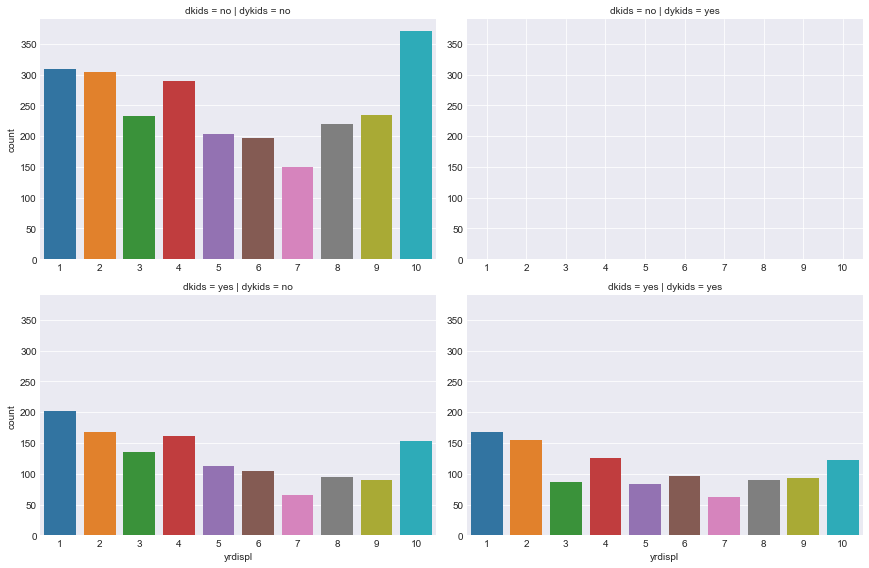

In [733]:
g = sns.factorplot(x='yrdispl', row='dkids', col='dykids', data=df, ci=.95,
               kind='count', size=4, aspect=1.5)

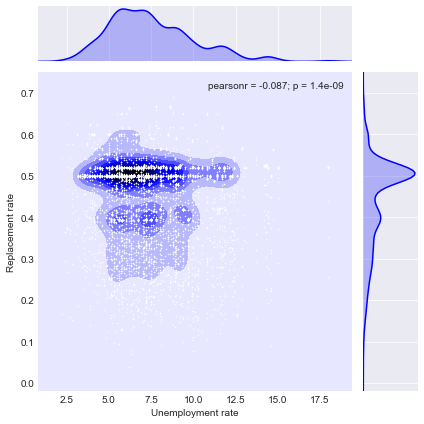

In [734]:
plt.figure(figsize=(12,6))
g = sns.jointplot(x="stateur", y="rr", data=df, kind="kde", color="b")
g.plot_joint(plt.scatter, c="w", s=1,  marker=".")
g.ax_joint.collections[1].set_alpha(.9)
g.set_axis_labels("Unemployment rate", "Replacement rate");

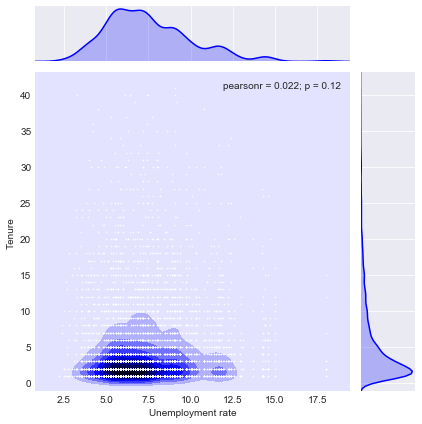

In [735]:
plt.figure(figsize=(12,6))
g = sns.jointplot(x="stateur", y="tenure", data=df, kind="kde", color="b")
g.plot_joint(plt.scatter, c="w", s=1,  marker=".")
g.ax_joint.collections[1].set_alpha(.9)
g.set_axis_labels("Unemployment rate", "Tenure");

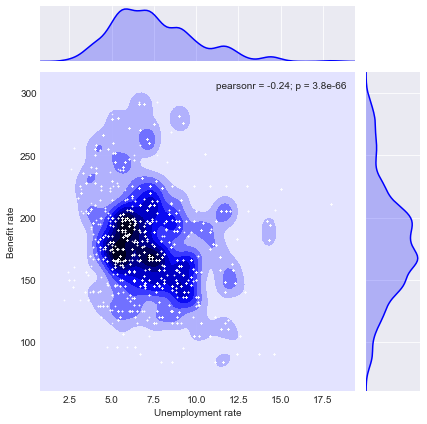

In [736]:
plt.figure(figsize=(12,6))
g = sns.jointplot(x="stateur", y="statemb", data=df, kind="kde", color="b")
g.plot_joint(plt.scatter, c="w", s=1,  marker=".")
g.ax_joint.collections[1].set_alpha(.9)
g.set_axis_labels("Unemployment rate", "Benefit rate");

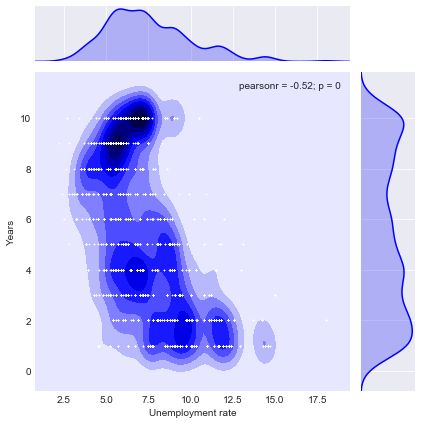

In [737]:
plt.figure(figsize=(12,6))
g = sns.jointplot(x="stateur", y="yrdispl", data=df, kind="kde", color="b")
g.plot_joint(plt.scatter, c="w", s=1,  marker=".")
g.ax_joint.collections[1].set_alpha(.9)
g.set_axis_labels("Unemployment rate", "Years");

## MLE

* We only consider the rate representation for each state in each year
* It is necessary to eliminate these duplicate rates as the prerequisite for modeling phase

This can be interpreted as: 

In 1982, CA should only has 51 different rates, TX also should has 51 different rates,...

In 1983, CA -> 51 another different rates , TX, -> 51 another different rates,...

In [738]:
# extract unique unemployment rate of each year into a 1 dim list
ur_unique_count = []
tuples = []
for year in df.yrdispl.unique():
    for i in df.stateur[df.yrdispl == year].unique().tolist():
        ur_unique_count.append(i)
        tuples.append((i,year))
rates = [v[0] for v in tuples]
years = [v[1] for v in tuples]
df2 = pd.DataFrame({'stateur': rates, 'yrdispl': years})
# plt.plot(np.arange(len(ur_in_1982)), ur_in_1982)

In [739]:
print(f"Min unemployment rate: {min(df2.stateur):,}")
print(f"Max unemployment rate: {max(df2.stateur):,}")
print(f"Mean unemployment rate: {df2.stateur.mean():,}")

Min unemployment rate: 2.2
Max unemployment rate: 18.0
Mean unemployment rate: 7.119318181818182


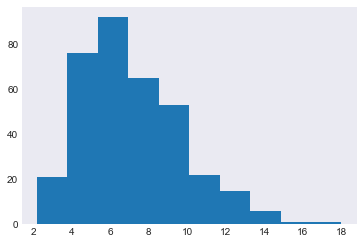

In [740]:
df2.stateur.hist(normed=False,
            bins=10, 
            grid=False);

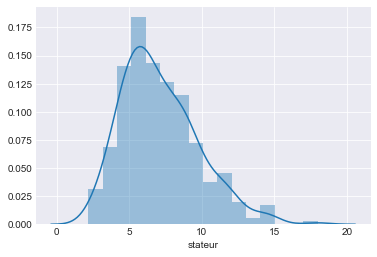

In [741]:
sns.distplot(df2.stateur, kde=True);

In [742]:
def normal_log_likelihood(m, data):
    "Calculate the log-likelihoods"
    return sum(np.log(stats.norm(m, data.std()**2).pdf(data)))

In [743]:
range_of_means = np.linspace(0, 18)
likelihoods = [normal_likelihood(m, df2.stateur) for m in range_of_means]
loglikelihoods = [normal_log_likelihood(m, df2.stateur) for m in range_of_means]

NameError: name 'normal_likelihood' is not defined

In [ ]:
# Plot the log-likelihoods
# We want the "top of the mountain", aka where the derivative is zero in a monotonically increasing function
fig = plt.figure().add_subplot(111)
fig.plot(range_of_means, loglikelihoods)
fig.set_xlabel('$\mu$', fontsize=20)
fig.set_ylabel('$l(\mu)$', fontsize=20);

In [ ]:
# For our window of means where is the peak
top_of_the_mountain = range_of_means[np.argmax(loglikelihoods)]
f"{top_of_the_mountain:.4}"

In [ ]:
# Let's define our "least-wrong" model for the empircal data. This might not be the "true" but is "useful"
μ = top_of_the_mountain
σ = df2.stateur.std() # Given to us so we don't have to estimate it

In [ ]:
from scipy.stats import norm, poisson, skewnorm, binom, gamma

# Let's plot our model on our data
# df2.stateur.hist(normed=True, bins=13, grid=False, fit=stats.gamma);
sns.distplot(df2.stateur, kde=False, fit=stats.gamma)
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
x1 = np.linspace(xmin-1, xmax-1, 100)

μ_skew = stats.skew(df2.stateur, bias=True)
μ_skew_kurtosis = stats.kurtosis(df2.stateur, bias=False)
p1 = norm.pdf(x, μ, σ)
# p2 = binom.pmf(x, μ, .9)
p2 = gamma.pdf(x, μ)
# p3 = poisson.pdf(x, μ)

# p4 = stats.chi2.pdf(x, μ-μ_skew_kurtosis/2, σ)

plt.plot(x, p1, 'k', linewidth=2, c='red');
plt.plot(x, p2, 'k', linewidth=2, c = 'green');
# plt.plot(x, p3, 'k', linewidth=2, c = 'b');
print("Skewness:", stats.skew(df2.stateur, bias=False),  "\nKurtosis skewness:", μ_skew)
plt.title("Fit results: mu = {:.2f},  std = {:.2f}".format(μ, σ));

* From above plot, the assumption of normal distribution is not completely correct. The distribution looks skew toward the right

In [ ]:
# compare information lost between two distributions
norm_entropy = scipy.stats.entropy(pk=p1, qk=None, base=None)
gamma_entropy = scipy.stats.entropy(pk=p2, qk=None, base=None)
print("Information lost score calculation")
print("Normal distribution:", norm_entropy)
print("Gamma distribution:", gamma_entropy)

## Gamma modeling

In [744]:
# initialize potential models
df['const'] = 1

reg1 = 'const + age + tenure + rr + joblost + nwhite + school12 + sex + bluecol + smsa + married + dkids + dykids + yrdispl + head + ui'
reg2 = 'const + statemb + rr + joblost == "slack_work"\
                   + smsa == "yes" + nwhite == "no"  + bluecol  +\
                   yrdispl  + ui'
reg3 = 'const + rr + joblost == "slack_work" + smsa == "yes" + statemb +  yrdispl'
# reg4 = 'const + rr'

In [745]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

results = smf.glm('stateur ~ ' + reg1 ,
              data=df, 
              offset=np.log(df.rr), 
              family=sm.families.Gamma(sm.families.links.log)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                stateur   No. Observations:                 4877
Model:                            GLM   Df Residuals:                     4860
Model Family:                   Gamma   Df Model:                           16
Link Function:                    log   Scale:                  0.080854369855
Method:                          IRLS   Log-Likelihood:                -10400.
Date:                Mon, 11 Dec 2017   Deviance:                       396.08
Time:                        20:56:44   Pearson chi2:                     393.
No. Iterations:                     6                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         2.1987      0.015    143.798      0.000       2.169       2.229
joblost[T.position_abolished]  2.845e-05      0.016      0.002      0.999      -0.031       0.031
joblost[T.seasonal_job_ended]    -0.0107      0.023     -0.473      0.636      -0.055       0.034
joblost[T.slack_work]             0.0399      0.009      4.417      0.000       0.022       0.058
nwhite[T.yes]                     0.0063      0.012      0.540      0.590      -0.017       0.029
school12[T.yes]                   0.0116      0.011      1.099      0.272      -0.009       0.032
sex[T.male]                       0.0245      0.011      2.192      0.028       0.003       0.046
smsa[T.yes]                      -0.0363      0.009     -4.168      0.000      -0.053      -0.019
married[T.yes]                   -0.0240      0.010     -2.355      0.019      -0.044      -0.004
dkids[T.yes]                      0.0225      0.011      2.130      0.033       0.002       0.043
dykids[T.yes]                    -0.0048      0.012     -0.385      0.700      -0.029       0.019
head[T.yes]                      -0.0163      0.010     -1.564      0.118      -0.037       0.004
ui[T.yes]                         0.0520      0.009      5.791      0.000       0.034       0.070
const                             2.1987      0.015    143.798      0.000       2.169       2.229
age                              -0.0003      0.000     -0.511      0.609      -0.001       0.001
tenure                            0.0006      0.001      0.787      0.432      -0.001       0.002
rr                               -2.9404      0.041    -71.649      0.000      -3.021      -2.860
yrdispl                          -0.0524      0.001    -38.990      0.000      -0.055      -0.050
=================================================================================================
"""

In [619]:
results = smf.glm('stateur ~ ' + reg2,
              data=df, 
#               offset=np.log(df.stateur), 
              family=sm.families.Gamma(sm.families.links.log)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                stateur   No. Observations:                 4877
Model:                            GLM   Df Residuals:                     4869
Model Family:                   Gamma   Df Model:                            7
Link Function:                    log   Scale:                 0.0721286427745
Method:                          IRLS   Log-Likelihood:                -10234.
Date:                Mon, 11 Dec 2017   Deviance:                       370.00
Time:                        19:17:08   Pearson chi2:                     351.
No. Iterations:                     6                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           1.1100      0.012     92.575      0.000       1.087       1.134
joblost == "slack_work"[T.True]     0.0396      0.008      5.089      0.000       0.024       0.055
smsa == "yes"[T.True]              -0.0381      0.008     -4.598      0.000      -0.054      -0.022
nwhite == "no"[T.True]             -0.0219      0.011     -1.989      0.047      -0.043      -0.000
ui[T.yes]                           0.0479      0.008      5.704      0.000       0.031       0.064
const                               1.1100      0.012     92.575      0.000       1.087       1.134
statemb                             0.0012      0.000      9.712      0.000       0.001       0.001
rr                                 -0.2612      0.038     -6.815      0.000      -0.336      -0.186
yrdispl                            -0.0621      0.002    -39.065      0.000      -0.065      -0.059
===================================================================================================
"""

In [620]:
results = smf.glm('stateur ~ ' + reg3,
              data=df, 
              offset=np.log(df.rr), 
              family=sm.families.Gamma(sm.families.links.log)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                stateur   No. Observations:                 4877
Model:                            GLM   Df Residuals:                     4871
Model Family:                   Gamma   Df Model:                            5
Link Function:                    log   Scale:                   0.07859151701
Method:                          IRLS   Log-Likelihood:                -10373.
Date:                Mon, 11 Dec 2017   Deviance:                       391.72
Time:                        19:17:08   Pearson chi2:                     383.
No. Iterations:                     5                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           2.1633      0.011    197.340      0.000       2.142       2.185
joblost == "slack_work"[T.True]     0.0456      0.008      5.657      0.000       0.030       0.061
smsa == "yes"[T.True]              -0.0482      0.009     -5.591      0.000      -0.065      -0.031
const                               2.1633      0.011    197.340      0.000       2.142       2.185
rr                                 -3.0686      0.040    -77.407      0.000      -3.146      -2.991
statemb                             0.0012      0.000      9.943      0.000       0.001       0.001
yrdispl                            -0.0630      0.002    -38.293      0.000      -0.066      -0.060
===================================================================================================
"""

In [747]:
from statsmodels.iolib.summary2 import summary_col

regs = [reg1, reg2, reg3]
reg_names = ['Model 1', 'Model 2', 'Model 3']
info_dict = {'Pseudo R-squared': lambda x: "{:.2f}".format(x.prsquared),
             'No. observations': lambda x: "{0:d}".format(int(x.nobs))}
regressor_order = ['const' , 'age' , 'tenure' , 'rr' , 'joblost' , 'nwhite' , 'school12' , 'sex' ,\
                'bluecol' , 'smsa' , 'married' , 'dkids' , 'dykids' , 'yrdispl' , 'head' , 'ui']
results = []

for reg in regs:
    result = smf.glm('stateur ~ ' + reg,
              data=df, 
#               offset=np.log(df.rr), 
              family=sm.families.Gamma()).fit() # sm.families.links.log
    results.append(result)

results_table = summary_col(results=results,
                            float_format='%0.3f',
                            stars=True,
                            model_names=reg_names,
                            info_dict=info_dict,
                            regressor_order=regressor_order)
results_table.add_title('Table 1 - Explaining the Employment Rate from 1982 - 1991')
print(results_table)

/Users/Tai/anaconda3/envs/special_topics/lib/python3.6/site-packages/statsmodels/genmod/generalized_linear_model.py:244: DomainWarning:

The inverse_power link function does not respect the domain of the Gamma family.



  Table 1 - Explaining the Employment Rate from 1982 - 1991
                                 Model 1   Model 2   Model 3 
-------------------------------------------------------------
const                           0.048***  0.053***  0.052*** 
                                (0.002)   (0.002)   (0.001)  
age                             0.000                        
                                (0.000)                      
tenure                          -0.000**                     
                                (0.000)                      
rr                              0.017***  0.032***  0.033*** 
                                (0.005)   (0.005)   (0.005)  
yrdispl                         0.008***  0.009***  0.009*** 
                                (0.000)   (0.000)   (0.000)  
Intercept                       0.048***  0.053***  0.052*** 
                                (0.002)   (0.002)   (0.001)  
dkids[T.yes]                    -0.003**                     
          

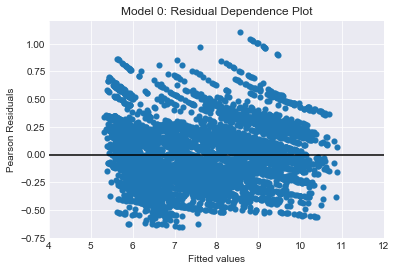

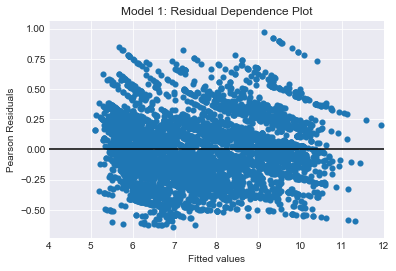

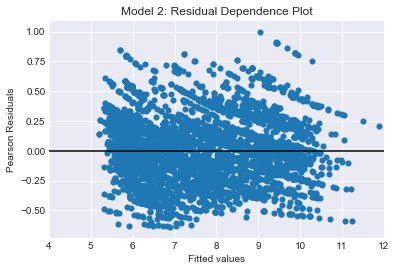

In [748]:
#Plot yhat vs. Pearson residuals:
# fig, plt = plt.subplots()

for i in range(3):
    yhat = results[i].mu
    plt.scatter(yhat, results[i].resid_pearson, marker='o', linewidths=.1)
    plt.hlines(0, 0, 12)
    plt.xlim(4,12)
    plt.title('Model '+ str(i) + ': Residual Dependence Plot')
    plt.ylabel('Pearson Residuals')
    plt.xlabel('Fitted values')
    plt.show()

In [778]:
from sklearn.metrics import mean_squared_error

# nobs = res.nobs
y = df.stateur
yhat = results[1].mu
# print('yhat')
# print('\tLength:', len(yhat))
# print('\tFirst 5 points:', yhat[:5])
# print('y:')
# print('\tLength:', len(y))
# print('\tFirst 5 points:', y.tolist()[:5])
print('Mean Squared Error')
for i in range(3):
    print('\nModel',i,':', round(mean_squared_error(y, results[i].mu),4) )

Mean Squared Error

Model 0 : 4.2294

Model 1 : 4.1703

Model 2 : 4.2054


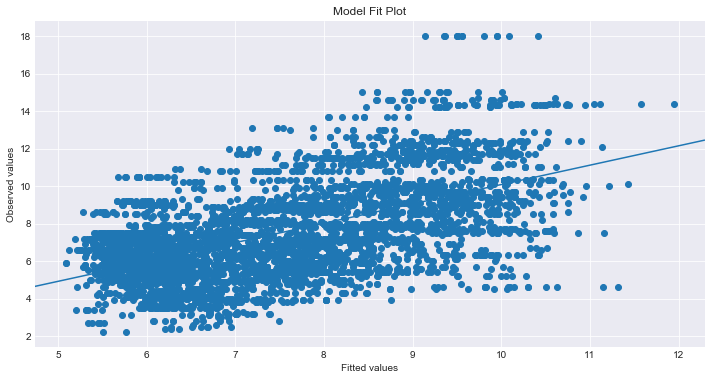

In [750]:
from statsmodels.graphics.api import abline_plot

fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(yhat, y)
line_fit = sm.GLM(y, sm.add_constant(yhat, prepend=True)).fit()
abline_plot(model_results=line_fit, ax=ax)

ax.set_title('Model Fit Plot')
ax.set_ylabel('Observed values')
ax.set_xlabel('Fitted values');

NameError: name 'res' is not defined

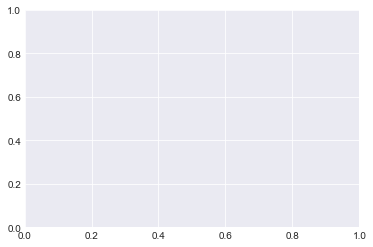

In [751]:
# from scipy import stats

fig, ax = plt.subplots()

resid = res.resid_deviance.copy()
resid_std = stats.zscore(resid)
ax.hist(resid_std, bins=25)
ax.set_title('Histogram of standardized deviance residuals');

/Users/Tai/anaconda3/envs/special_topics/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



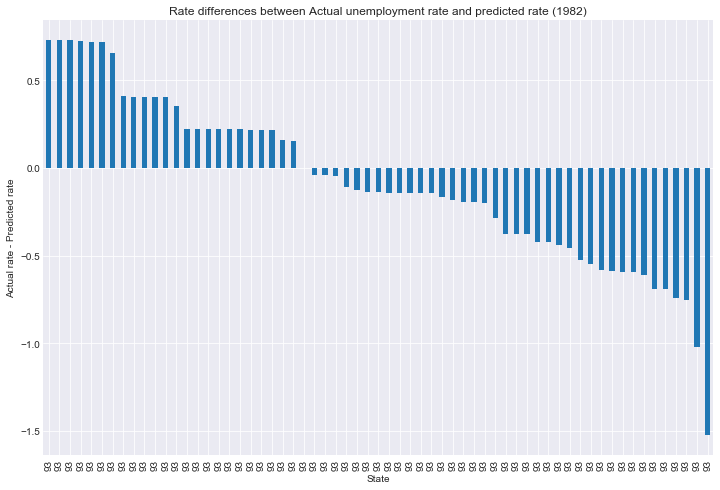

In [752]:
data = ['const', 'statemb', 'age', 'state','tenure', 'rr', 'stateur','joblost' , 'nwhite' , 'school12' , 'sex' ,\
                'bluecol' , 'smsa' , 'married' , 'dkids' , 'dykids' , 'yrdispl' , 'head' , 'ui']
results_df = df[data].dropna()

# Use last model (model 3)
results_df['prediction'] = results[1].predict() # results[-1].predict()

# Calculate difference
results_df['difference'] = results_df['stateur'] - results_df['prediction']

results_df['prediction_plus_mean'] = results_df['prediction']
# Sort in descending order
results_df.sort_values('difference', ascending=False, inplace=True)

# Plot the first 15 data points
year = 1
state = 93
results_df[results_df.yrdispl == year][results_df.state == state].plot('state', 'difference', kind='bar', figsize=(12,8), legend=False)
# plt.ylabel('Unemployment rate above predicted rate')
plt.ylabel('Actual rate - Predicted rate')
plt.xlabel('State',)
plt.title('Rate differences between Actual unemployment rate and predicted rate (' + str(1981+year) +')')
plt.show()

['1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991']


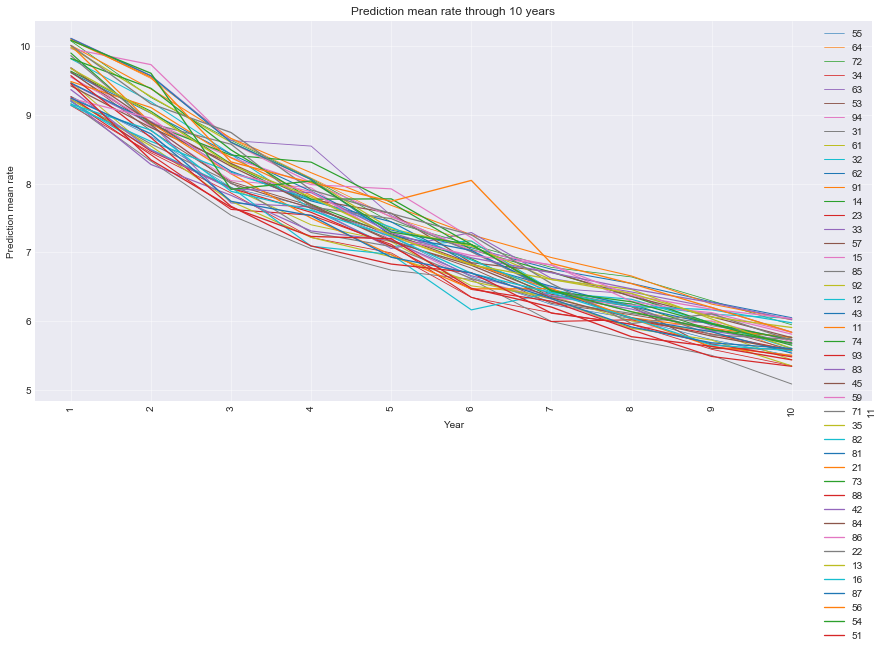

In [753]:
fig= plt.figure(figsize=[15,7])
state_rate = []
all_state_rate = []
rate_list = []
year_list = sorted(results_df.yrdispl.unique())
plot = False
for j,state_code in enumerate(results_df.state.unique()):
    for i in year_list:
        try:
            valid = [v for v in year_dict[str(1981+i)] if v == state_code]
            if valid != []:
                plot = False
#                 print(valid)
            mean_diff_rate = np.mean(results_df.prediction[results_df.yrdispl == i][results_df.state == state_code])
            results_df['prediction_plus_mean'][results_df.yrdispl == i][results_df.state == state_code] = results_df['prediction_plus_mean'][results_df.yrdispl == i][results_df.state == state_code] + mean_diff_rate
            mean_rate = np.mean(results_df.prediction[results_df.yrdispl == i][results_df.state == state_code])
            state_rate.append(mean_rate)
#             rate = np.mean(df.stateur[df.yrdispl == i][df.state == state_code].unique())
#             rate_list.append(rate)
        except:
            pass
#             print(1981+i,rate)
    if plot == True:
        plt.plot([o for o in year_list], [v for v in state_rate], lw = 0.5+j/(10+j))
#         plt.plot([o for o in year_list], [v for v in rate_list], lw = 0.5+j/(10+j))
    else:
        plot = True
    all_state_rate.append(state_rate)
    plt.title("Unemployment rate for state code = 93 through 1982 - 1991")
    state_rate = []
    rate_list = []
years = [str(1981+i) for i in range(1,11)]
print(years)
plt.xticks([o for o in year_list])
plt.xlabel("Year")
plt.ylabel("Prediction mean rate")
plt.xticks(range(1,12), rotation='vertical')
plt.title("Prediction mean rate through 10 years")
plt.legend(results_df.state.unique())
plt.grid(True, axis='x', which='major', alpha=.5)
plt.grid(True, axis='y', which='major', alpha=.5)

plt.show()

/Users/Tai/anaconda3/envs/special_topics/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning:

Mean of empty slice.



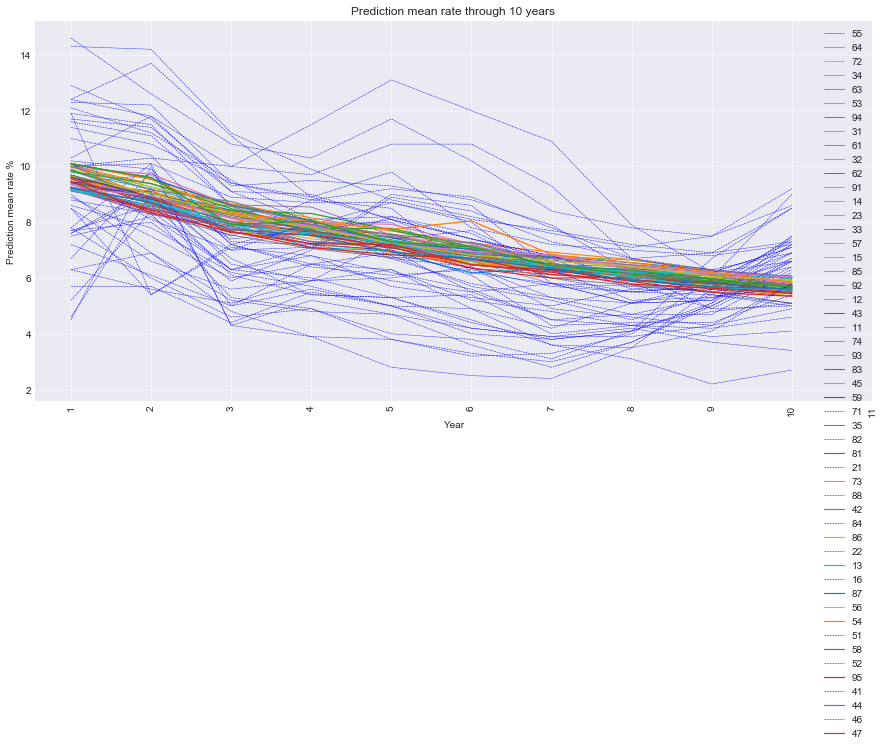

In [754]:
fig= plt.figure(figsize=[15,7])
state_rate = []
all_state_rate = []
rate_list = []
year_list = sorted(results_df.yrdispl.unique())
plot = False
for j,state_code in enumerate(results_df.state.unique()):
    for i in year_list:
        try:
            valid = [v for v in year_dict[str(1981+i)] if v == state_code]
            if valid != []:
                plot = False
#                 print(valid)
            mean_diff_rate = np.mean(results_df.prediction[results_df.yrdispl == i][results_df.state == state_code])
            results_df['prediction_plus_mean'][results_df.yrdispl == i][results_df.state == state_code] = results_df['prediction_plus_mean'][results_df.yrdispl == i][results_df.state == state_code] + mean_diff_rate
            mean_rate = np.mean(results_df.prediction[results_df.yrdispl == i][results_df.state == state_code])
            state_rate.append(mean_rate)
            rate = np.mean(df.stateur[df.yrdispl == i][df.state == state_code].unique())
            rate_list.append(rate)
        except:
            pass
#             print(1981+i,rate)
    if plot == True:
        plt.plot([o for o in year_list], [v for v in state_rate], lw = 0.5+j/(10+j))
        plt.plot([o for o in year_list], [v for v in rate_list], 'b--', lw = 0.5)
    else:
        plot = True
    all_state_rate.append(state_rate)
    plt.title("Unemployment rate for state code = 93 through 1982 - 1991")
    state_rate = []
    rate_list = []
years = [str(1981+i) for i in range(1,11)]
plt.xticks([o for o in year_list])
plt.xlabel("Year")
plt.ylabel("Prediction mean rate %")
plt.xticks(range(1,12), rotation='vertical')
plt.title("Prediction mean rate through 10 years")
plt.legend(results_df.state.unique())
plt.grid(True, axis='x', which='major', alpha=.5)
plt.grid(True, axis='y', which='major', alpha=.5)

plt.show()

In [755]:
flatten_rates = np.array(all_state_rate).flatten()
nan = [1 for i in flatten_rates if i is None]
dfr = pd.DataFrame(data=flatten_rates, columns=['rate'])
dfr = dfr.dropna(axis = 0)

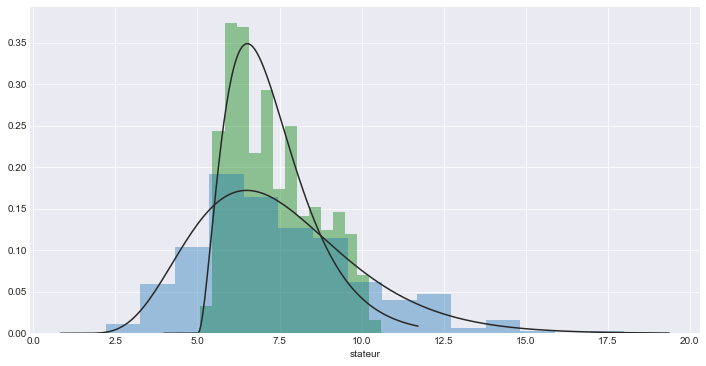

In [756]:
plt.figure(figsize=(12,6))
sns.distplot(dfr.rate, bins=15, color='g', kde=False, fit=stats.gamma)
sns.distplot(df.stateur, bins=15, kde=False, fit=stats.gamma)

In [757]:
np.std(df.stateur)

2.5003221655121299

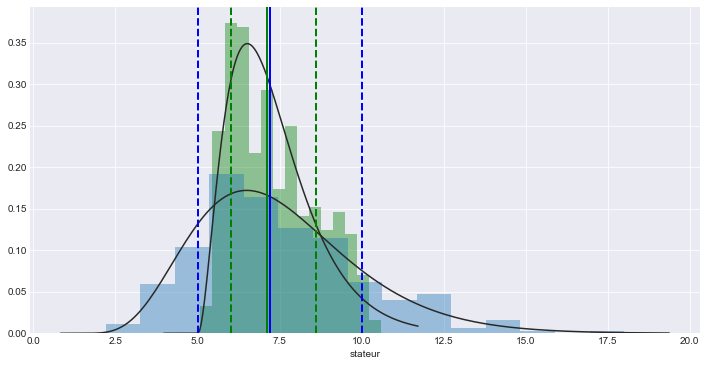

In [758]:
plt.figure(figsize=(12,6))
sns.distplot(dfr.rate, bins=15, color='g', kde=False, fit=stats.gamma)
sns.distplot(df.stateur, bins=15, kde=False, fit=stats.gamma)

dfr_std1 = np.mean(dfr.rate) - np.std(dfr.rate)
dfr_std2 = np.mean(dfr.rate) + np.std(dfr.rate)
plt.axvline(dfr_std1, color='g', linestyle='dashed', linewidth=2)
plt.axvline(dfr_std2, color='g', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(dfr.rate, 50), color='g', linestyle='-', linewidth=2)

std1 = np.mean(df.stateur) - np.std(df.stateur)
std2 = np.mean(df.stateur) + np.std(df.stateur)

plt.axvline(std1, color='b', linestyle='dashed', linewidth=2)
plt.axvline(std2, color='b', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(df.stateur, 50), color='b', linestyle='-', linewidth=2)


In [759]:
mean_rate_per_year = []
pred_mean_rate_per_year = []
rate_list = []
rate_list1 = []
for i in year_list:
    for j,state_code in enumerate(results_df.state.unique()):
        rate = np.mean(df.stateur[df.yrdispl == i][df.state == state_code][df.stateur.isnull() == False].unique())
        rate1 = np.mean(results_df.prediction[results_df.yrdispl == i][results_df.state == state_code])
        rate_list.append(rate)
        rate_list1.append(rate1)
    rate_list = [i for i in rate_list if np.isnan([i]) == False]
    rate_list1 = [i for i in rate_list1 if np.isnan([i]) == False]

    mean_rate_per_year.append(np.mean(rate_list))
    pred_mean_rate_per_year.append(np.mean(rate_list1))

    rate_list = []
    rate_list1 = []

/Users/Tai/anaconda3/envs/special_topics/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning:

Mean of empty slice.



In [760]:
#compare mean rate ( from actual data and predictions)
dft = pd.DataFrame({'x': np.arange(len(mean_rate_per_year)), 'y': mean_rate_per_year})
dft1 = pd.DataFrame({'x': np.arange(len(pred_mean_rate_per_year)), 'y': pred_mean_rate_per_year})

Text(0.5,1,'Mean unemployment rate')

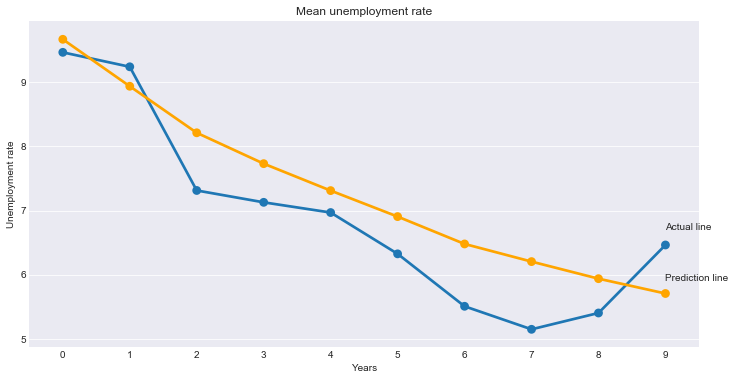

In [761]:
plt.figure(figsize=(12,6))
# sns.regplot('x', 'y', data=dft, fit_reg=True, ci=95, x_ci=95)
# sns.regplot('x', 'y', data=dft1, fit_reg=True, ci=95, x_ci=95)
# sns.set_style("darkgrid")
sns.pointplot(x="x", y="y", data=dft, alpha=.1)
sns.pointplot(x="x", y="y", data=dft1, alpha=.01, color='orange')
plt.text(9, 5.9, str('Prediction line'))
plt.text(9, 6.7, str('Actual line'))
plt.xlabel('Years')
plt.ylabel('Unemployment rate')

plt.title("Mean unemployment rate")

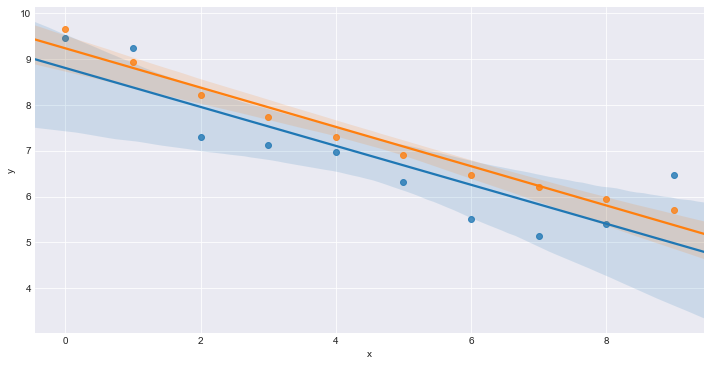

In [763]:
plt.figure(figsize=(12,6))
sns.regplot('x', 'y', data=dft, fit_reg=True, ci=95, x_ci=95)
sns.regplot('x', 'y', data=dft1, fit_reg=True, ci=95, x_ci=95)

## Two sample t-test

In [764]:
t_stat, p_value = stats.ttest_ind(results_df.prediction,df.stateur, equal_var=False)
print("t-test statistic:", t_stat)
print("p_value         :", p_value)
if p_value > 0.05:
    print('p_value > 0.05 -> Fail to reject null hypothesis')

t-test statistic: 6.6497151168e-11
p_value         : 0.999999999947
p_value > 0.05 -> Fail to reject null hypothesis


The P-value, 0.9999, tells us it is "likely" that we would observe such an extreme test statistic t* in the direction of Ha if the null hypothesis were true. Therefore, our initial assumption that the null hypothesis is wrong must be incorrect. That is, since the P-value, 0.9999, is greater than α = 0.05, we failt to reject the null hypothesis H0 : μ0 = μ1.

## Generating map for a random year

In [775]:
import plotly
import plotly.plotly as py
import pandas as pd

dff = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')

def geo_graph(df, column, filename):
    for col in df.columns:
        df[col] = df[col].astype(str)

    scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
                [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

    # dt_timegrid
    # dff['text'] = dff['state'] + '<br>' +\
    #     'Beef '+dff['beef']+' Dairy '+dff['dairy']+'<br>'+\
    #     'Fruits '+dff['total fruits']+' Veggies ' + dff['total veggies']+'<br>'+\
    #     'Wheat '+dff['wheat']+' Corn '+dff['corn']

    data = [ dict(
            type='choropleth',
            colorscale = scl,
            autocolorscale = False,
            locations = dff['code'],
            z = df[column].astype(float),
            locationmode = 'USA-states',
    #         text = dff['text'],
            marker = dict(
                line = dict (
                    color = 'rgb(255,255,255)',
                    width = 2
                )
            ),
            colorbar = dict(
                title = "Unemployment rate"
            )
        ) ]

    layout = dict(
            title = 'Actual Unemployment rate across 51 States in 1991',
            geo = dict(
                scope='usa',
                projection=dict( type='albers usa' ),
                showlakes = True,
                lakecolor = 'rgb(255, 255, 255)',
            ),
        )
    
    fig = dict( data=data, layout=layout )
    plotly.offline.init_notebook_mode(connected=True)
    url = plotly.offline.plot(fig, filename )
    return url


In [776]:
fig = geo_graph(df.loc[df.yrdispl == 10,:], 'stateur', filename='actual_rate_map.html')

/Users/Tai/anaconda3/envs/special_topics/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [777]:
fig2 = geo_graph(results_df.loc[results_df.yrdispl == 10], 'prediction', filename='prediction_rate_map.html')

/Users/Tai/anaconda3/envs/special_topics/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [728]:
# fig= plt.figure(figsize=[12,10])
# rate_list = []
# year_list = sorted(df.yrdispl.unique())
# for j,state_code in enumerate(df.state.unique()):
#     for i in year_list:
#         try:
#             rate = df.stateur[df.yrdispl == i][df.state == state_code].unique()
#             rate_list.append(rate[0])
#         except:
#             print(1981+i,rate)
#     try:
#         plt.plot([o for o in year_list], rate_list)
#     except:
#         print(j)
    
#     # plt.title("Unemployment rate for state code = 93 through 1982 - 1991")
#     rate_list = []
# plt.xticks([o for o in year_list])
# plt.xlabel("Year")
# plt.ylabel("Unemployment rate %")
# plt.show()

In [187]:
# plt.figure(figsize=(12,12))
# d = df.state[df.yrdispl == 1].value_counts()
# plt.barh(list(d.index), list(d.values), label=d)